# Manipulating data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from urllib.request import urlretrieve
plt.style.use('ggplot')

In [2]:
!pip install xlrd==1.2.0 --quiet

     |████████████████████████████████| 103 kB 15.8 MB/s 


In [3]:
store = pd.read_excel('superstore.xls')
store.head(8)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152


In [4]:
def clean_cols(df):
  new_cols = []
  for col in df.columns:
    new_cols.append(col.replace(' ', '_').lower())
  df.columns = new_cols
  

clean_cols(store)

In [5]:
store.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [6]:
store.drop(columns=['row_id'], inplace=True)
store.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'sub-category', 'product_name',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [7]:
store.shape

(9994, 20)

# Subsetting the DataFrame

In [8]:
store.loc[[i for i in range(5,10)], ['customer_id', 'customer_name', 'city', 'postal_code', 'sales']]

,customer_id,customer_name,city,postal_code,sales
5,BH-11710,Brosina Hoffman,Los Angeles,90032,48.860
6,BH-11710,Brosina Hoffman,Los Angeles,90032,7.280
7,BH-11710,Brosina Hoffman,Los Angeles,90032,907.152
8,BH-11710,Brosina Hoffman,Los Angeles,90032,18.504
9,BH-11710,Brosina Hoffman,Los Angeles,90032,114.900


## Determining Statistics on Sales and Profit

In [9]:
store.loc[[i for i in range(100, 200)], ['sales', 'profit']].describe().T

,count,mean,std,min,25%,50%,75%,max
sales,100.0,262.957220,858.983762,1.788,21.3270,66.9600,177.0950,8159.952
profit,100.0,0.347574,170.744869,-1359.992,1.6359,9.6536,23.4588,585.552


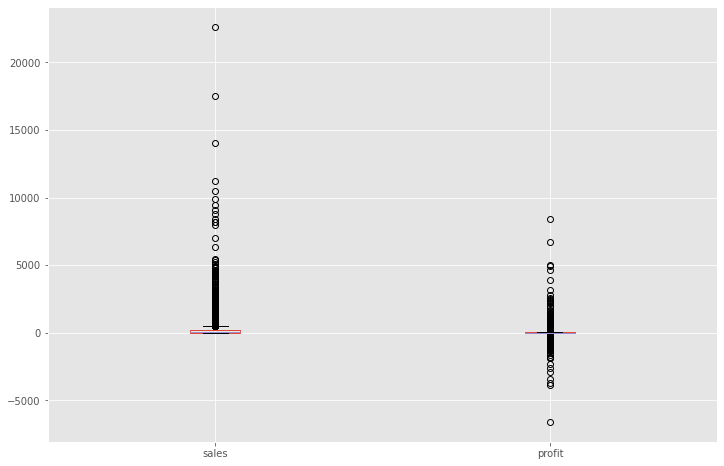

In [10]:
plt.figure(figsize=(12, 8))
store[['sales', 'profit']].boxplot()

## The unique Function

In [11]:
store['country'].unique()

array(['United States'], dtype=object)

In [12]:
store.city.unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [13]:
store.city.nunique()

531

In [14]:
store.state.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [15]:
store.state.nunique()

49

## Conditional Selection and Boolean Filtering

In [16]:
store[['sales', 'profit']][store.state=='California'].mean()

sales     228.729451
profit     38.171608
dtype: float64

In [17]:
store[['state']][store.sales==store.sales.max()]

,state
2697,Florida


In [18]:
store[['state']][store.sales==store.sales.min()]

,state
4101,Texas


In [19]:
store.sort_values(by=['sales'], ascending=False).head()[['state', 'ship_mode', 'category']]

,state,ship_mode,category
2697,Florida,Standard Class,Technology
6826,Indiana,Standard Class,Technology
8153,Washington,First Class,Technology
2623,New York,First Class,Technology
4190,Delaware,Standard Class,Technology


In [20]:
m1 = store.sales > store.sales.std()
m2 = store.profit > store.profit.std()
# store.segment[m1].value_counts()
mask = (m1 & m2)

In [21]:
store[['segment', 'sales', 'profit']][mask].sort_values(by=['sales','profit'], ascending=False)

,segment,sales,profit
6826,Corporate,17499.950,8399.9760
8153,Consumer,13999.960,6719.9808
2623,Home Office,11199.968,3919.9888
4190,Consumer,10499.970,5039.9856
9039,Consumer,9892.740,4946.3700
...,...,...,...
9272,Corporate,631.960,303.3408
5118,Consumer,629.930,296.0671
3399,Corporate,629.100,301.9680
4923,Home Office,629.100,301.9680


##  Setting and Resetting the Index

In [22]:
matrix_data = np.matrix('22,66,140;42,70,148;30,62,125;35,68,160;25,62,152')
row_labels = ['A','B','C','D','E']
column_headings = ['Age', 'Height', 'Weight']

In [23]:
df1 = pd.DataFrame(data=matrix_data, index=row_labels, columns=column_headings)
df1

,Age,Height,Weight
A,22,66,140
B,42,70,148
C,30,62,125
D,35,68,160
E,25,62,152


In [24]:
df1.reset_index()

,index,Age,Height,Weight
0,A,22,66,140
1,B,42,70,148
2,C,30,62,125
3,D,35,68,160
4,E,25,62,152


In [25]:
df1.reset_index(drop=True)

,Age,Height,Weight
0,22,66,140
1,42,70,148
2,30,62,125
3,35,68,160
4,25,62,152


In [26]:
df1['Profession'] = 'Student Teacher Engineer Doctor Nurse'.split()
df1

,Age,Height,Weight,Profession
A,22,66,140,Student
B,42,70,148,Teacher
C,30,62,125,Engineer
D,35,68,160,Doctor
E,25,62,152,Nurse


In [27]:
df1.set_index('Profession')

,Age,Height,Weight
Profession,,,
Student,22,66,140
Teacher,42,70,148
Engineer,30,62,125
Doctor,35,68,160
Nurse,25,62,152


## The GroupBy Method

In [28]:
df_subset = store.loc[[i for i in range(10)], ['ship_mode', 'state', 'sales']]
df_subset

,ship_mode,state,sales
0,Second Class,Kentucky,261.9600
1,Second Class,Kentucky,731.9400
2,Second Class,California,14.6200
3,Standard Class,Florida,957.5775
4,Standard Class,Florida,22.3680
5,Standard Class,California,48.8600
6,Standard Class,California,7.2800
7,Standard Class,California,907.1520
8,Standard Class,California,18.5040
9,Standard Class,California,114.9000


In [29]:
by_state = df_subset.groupby('state')
by_state

Grouping by `State` column and listing mean sale

In [30]:
by_state.mean()

,sales
state,
California,185.219333
Florida,489.972750
Kentucky,496.950000


Grouping by 'State' column and listing tota

In [31]:
by_state.sum()

,sales
state,
California,1111.3160
Florida,979.9455
Kentucky,993.9000


In [32]:
by_state.describe().loc[['California']].T

state        California
sales count    6.000000
      mean   185.219333
      std    355.889307
      min      7.280000
      25%     15.591000
      50%     33.682000
      75%     98.390000
      max    907.152000

In [33]:
df_subset.groupby('ship_mode').describe().T

ship_mode    Second Class  Standard Class
sales count      3.000000        7.000000
      mean     336.173333      296.663071
      std      364.373037      435.947552
      min       14.620000        7.280000
      25%      138.290000       20.436000
      50%      261.960000       48.860000
      75%      496.950000      511.026000
      max      731.940000      957.577500

In [34]:
store.groupby(['state', 'city']).describe()['sales']

count         mean         std       min        25%  \
state     city                                                              
Alabama   Auburn        6.0   294.471667  361.914543     3.760     8.8050   
          Decatur      13.0   259.601538  385.660903    14.940    23.9200   
          Florence      5.0   399.470000  796.488863     4.980     7.2700   
          Hoover        4.0   131.462500  230.646923     7.160    13.3925   
          Huntsville   10.0   248.437000  419.576667     3.620    26.8700   
...                     ...          ...         ...       ...        ...   
Wisconsin Superior      9.0   144.414444  213.394065     5.560    17.1200   
          Waukesha      1.0    54.500000         NaN    54.500    54.5000   
          Wausau        4.0    79.370000  111.450605    12.390    20.0325   
          West Allis    2.0   125.240000  165.067007     8.520    66.8800   
Wyoming   Cheyenne      1.0  1603.136000         NaN  1603.136  1603.1360   

                           50%        75%       max  
state     city                                       
Alabama   Auburn       182.030   456.4075   900.080  
          Decatur       44.950   239.9200  1215.920  
          Florence      12.480   152.7600  1819.860  
          Hoover        20.725   138.7950   477.240  
          Huntsville    81.920   171.8075  1319.960  
...                        ...        ...       ...  
Wisconsin Superior      47.400   125.9900   629.100  
          Waukesha      54.500    54.5000    54.500  
          Wausau        29.605    88.9425   245.880  
          West Allis   125.240   183.6000   241.960  
Wyoming   Cheyenne    1603.136  1603.1360  1603.136  

[604 rows x 8 columns]

## Detecting Outliers and Handling Missing Values

In [35]:
store_missing = pd.read_excel('superstore.xls', sheet_name="Missing")

In [36]:
store_missing.isna()

,Customer,Product,Sales,Quantity,Discount,Profit
0,False,True,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False
5,False,False,False,True,False,False
6,False,False,False,False,False,False
7,False,True,False,False,False,True
8,True,False,False,False,False,False
9,False,False,False,False,False,False


In [37]:
for col in store_missing.columns:
  miss = store_missing[col].isna().sum()
  if miss > 0:
    print(f'{col} has {miss} missing value(s)')
  else:
    print(f'{col} has 0 missing values')

Customer has 1 missing value(s)
Product has 2 missing value(s)
Sales has 1 missing value(s)
Quantity has 1 missing value(s)
Discount has 0 missing values
Profit has 1 missing value(s)


In [38]:
store_missing.fillna('FILL')

,Customer,Product,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,FILL,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,Phones,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,Art,8.56,2.0,0.0,2.4824
3,Zuschuss Donatelli,Phones,FILL,3.0,0.2,16.011
4,Zuschuss Donatelli,Binders,22.72,4.0,0.2,7.384
5,Eric Hoffmann,Binders,11.648,FILL,0.2,4.2224
6,Eric Hoffmann,Accessories,90.57,3.0,0.0,11.7741
7,Ruben Ausman,FILL,77.88,2.0,0.0,FILL
8,FILL,Accessories,13.98,2.0,0.0,6.1512
9,Kunst Miller,Binders,25.824,6.0,0.2,9.3612


In [39]:
store_missing[['Customer','Product']].fillna('FILL')

,Customer,Product
0,Brosina Hoffman,FILL
1,Brosina Hoffman,Phones
2,Zuschuss Donatelli,Art
3,Zuschuss Donatelli,Phones
4,Zuschuss Donatelli,Binders
5,Eric Hoffmann,Binders
6,Eric Hoffmann,Accessories
7,Ruben Ausman,FILL
8,FILL,Accessories
9,Kunst Miller,Binders


In [40]:
store_missing[['Sales']].fillna(method='ffill')

,Sales
0,1706.184
1,911.424
2,8.560
3,8.560
4,22.720
5,11.648
6,90.570
7,77.880
8,13.980
9,25.824


In [41]:
store_missing[['Sales']].fillna(method='bfill')

,Sales
0,1706.184
1,911.424
2,8.560
3,22.720
4,22.720
5,11.648
6,90.570
7,77.880
8,13.980
9,25.824


In [42]:
store_missing[['Sales']].fillna(store_missing.Sales.mean())

,Sales
0,1706.184
1,911.424
2,8.560
3,301.552
4,22.720
5,11.648
6,90.570
7,77.880
8,13.980
9,25.824


## The dropna Method

In [43]:
store_missing.shape

(11, 6)

In [44]:
store_missing.dropna(axis=0).shape

(6, 6)

In [45]:
store_missing.dropna(axis=1).shape

(11, 1)

In [46]:
store_missing.dropna(axis=1, thresh=10)

,Customer,Sales,Quantity,Discount,Profit
0,Brosina Hoffman,1706.184,9.0,0.2,85.3092
1,Brosina Hoffman,911.424,4.0,0.2,68.3568
2,Zuschuss Donatelli,8.560,2.0,0.0,2.4824
3,Zuschuss Donatelli,NaN,3.0,0.2,16.0110
4,Zuschuss Donatelli,22.720,4.0,0.2,7.3840
5,Eric Hoffmann,11.648,NaN,0.2,4.2224
6,Eric Hoffmann,90.570,3.0,0.0,11.7741
7,Ruben Ausman,77.880,2.0,0.0,NaN
8,NaN,13.980,2.0,0.0,6.1512
9,Kunst Miller,25.824,6.0,0.2,9.3612


## Outlier Detection Using a Simple Statistical Test

In [47]:
df_sample = store[['customer_name', 'state', 'sales', 'profit']].sample(50).copy()
df_sample['sales'].iloc[5] = -1000.
df_sample['sales'].iloc[15] = -500.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(array([-1200., -1000.,  -800.,  -600.,  -400.,  -200.,     0.,   200.,
          400.,   600.,   800.]), <a list of 11 Text major ticklabel objects>)

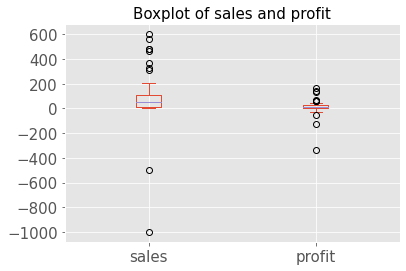

In [48]:
df_sample.plot.box()
plt.title("Boxplot of sales and profit", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

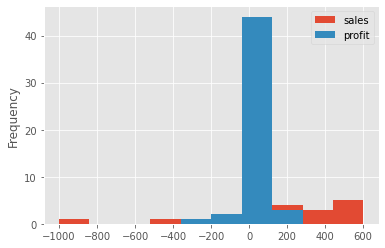

In [49]:
df_sample.plot.hist()

## Concatenation

In [50]:
df1 = store[['customer_name', 'state', 'sales','profit']].sample(4)
df2 = store[['customer_name', 'state', 'sales','profit']].sample(6)
df3 = store[['customer_name', 'state', 'sales','profit']].sample(4)
df4 = store[['customer_name', 'state', 'sales','profit']].sample(2)

df_cat1 = pd.concat([df1,df2,df3,df4], axis=0)
df_cat1

,customer_name,state,sales,profit
4985,Allen Goldenen,New York,14.400,7.0560
8741,Anthony Garverick,Indiana,10.740,5.1552
6256,Alyssa Tate,Florida,3.444,-2.5256
765,Chris Selesnick,Louisiana,646.740,258.6960
2519,Cynthia Delaney,Oklahoma,29.460,14.4354
2873,Scott Williamson,California,811.280,24.3384
6023,Linda Southworth,Rhode Island,69.980,4.8986
7399,Max Engle,Illinois,23.840,3.2780
5392,Georgia Rosenberg,Delaware,9.960,4.5816
2029,Guy Phonely,Massachusetts,104.900,25.1760


## Merging

In [51]:
df_1 = store.loc[0:3, ['ship_date','ship_mode','customer_name']]
df_1

,ship_date,ship_mode,customer_name
0,2016-11-11,Second Class,Claire Gute
1,2016-11-11,Second Class,Claire Gute
2,2016-06-16,Second Class,Darrin Van Huff
3,2015-10-18,Standard Class,Sean O'Donnell


In [52]:
df_2 = store.loc[0:3, ['customer_name','product_name','quantity']]
df_2

,customer_name,product_name,quantity
0,Claire Gute,Bush Somerset Collection Bookcase,2
1,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3
2,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
3,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5


In [53]:
pd.merge(df_1, df_2, on='customer_name', how='inner')

,ship_date,ship_mode,customer_name,product_name,quantity
0,2016-11-11,Second Class,Claire Gute,Bush Somerset Collection Bookcase,2
1,2016-11-11,Second Class,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3
2,2016-11-11,Second Class,Claire Gute,Bush Somerset Collection Bookcase,2
3,2016-11-11,Second Class,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3
4,2016-06-16,Second Class,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
5,2015-10-18,Standard Class,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5


In [54]:
pd.merge(df_1, df_2, on='customer_name', how='inner').drop_duplicates()

,ship_date,ship_mode,customer_name,product_name,quantity
0,2016-11-11,Second Class,Claire Gute,Bush Somerset Collection Bookcase,2
1,2016-11-11,Second Class,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3
4,2016-06-16,Second Class,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
5,2015-10-18,Standard Class,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5


In [55]:
df_3 = store.loc[2:5, ['customer_name','product_name','quantity']]
df_3

,customer_name,product_name,quantity
2,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
3,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5
4,Sean O'Donnell,Eldon Fold 'N Roll Cart System,2
5,Brosina Hoffman,Eldon Expressions Wood and Plastic Desk Access...,7


In [56]:
pd.merge(df_1, df_3, on='customer_name', how='inner').drop_duplicates()

,ship_date,ship_mode,customer_name,product_name,quantity
0,2016-06-16,Second Class,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
1,2015-10-18,Standard Class,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5
2,2015-10-18,Standard Class,Sean O'Donnell,Eldon Fold 'N Roll Cart System,2


In [57]:
pd.merge(df_1, df_3, on='customer_name', how='outer').drop_duplicates()

,ship_date,ship_mode,customer_name,product_name,quantity
0,2016-11-11,Second Class,Claire Gute,NaN,NaN
2,2016-06-16,Second Class,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2.0
3,2015-10-18,Standard Class,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5.0
4,2015-10-18,Standard Class,Sean O'Donnell,Eldon Fold 'N Roll Cart System,2.0
5,NaT,NaN,Brosina Hoffman,Eldon Expressions Wood and Plastic Desk Access...,7.0


In [58]:
df_1

,ship_date,ship_mode,customer_name
0,2016-11-11,Second Class,Claire Gute
1,2016-11-11,Second Class,Claire Gute
2,2016-06-16,Second Class,Darrin Van Huff
3,2015-10-18,Standard Class,Sean O'Donnell


In [59]:
df_3

,customer_name,product_name,quantity
2,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
3,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5
4,Sean O'Donnell,Eldon Fold 'N Roll Cart System,2
5,Brosina Hoffman,Eldon Expressions Wood and Plastic Desk Access...,7


## The join Method

In [60]:
df_1 = store.loc[0:3, ['ship_date','ship_mode','customer_name']]

In [61]:
df_1.set_index('customer_name', inplace=True)
df_1

,ship_date,ship_mode
customer_name,,
Claire Gute,2016-11-11,Second Class
Claire Gute,2016-11-11,Second Class
Darrin Van Huff,2016-06-16,Second Class
Sean O'Donnell,2015-10-18,Standard Class


In [62]:
df_2 = store.loc[2:5, ['customer_name','product_name','quantity']]

In [63]:
df_2.set_index('customer_name', inplace=True)
df_2

,product_name,quantity
customer_name,,
Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,2
Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,5
Sean O'Donnell,Eldon Fold 'N Roll Cart System,2
Brosina Hoffman,Eldon Expressions Wood and Plastic Desk Access...,7


In [64]:
df_1.join(df_2, how='left').drop_duplicates()

,ship_date,ship_mode,product_name,quantity
customer_name,,,,
Claire Gute,2016-11-11,Second Class,NaN,NaN
Darrin Van Huff,2016-06-16,Second Class,Self-Adhesive Address Labels for Typewriters b...,2.0
Sean O'Donnell,2015-10-18,Standard Class,Bretford CR4500 Series Slim Rectangular Table,5.0
Sean O'Donnell,2015-10-18,Standard Class,Eldon Fold 'N Roll Cart System,2.0


In [65]:
df_1.join(df_2, how='right').drop_duplicates()

,ship_date,ship_mode,product_name,quantity
customer_name,,,,
Brosina Hoffman,NaT,NaN,Eldon Expressions Wood and Plastic Desk Access...,7
Darrin Van Huff,2016-06-16,Second Class,Self-Adhesive Address Labels for Typewriters b...,2
Sean O'Donnell,2015-10-18,Standard Class,Bretford CR4500 Series Slim Rectangular Table,5
Sean O'Donnell,2015-10-18,Standard Class,Eldon Fold 'N Roll Cart System,2


In [66]:
df_1.join(df_2, how='inner').drop_duplicates()

,ship_date,ship_mode,product_name,quantity
customer_name,,,,
Darrin Van Huff,2016-06-16,Second Class,Self-Adhesive Address Labels for Typewriters b...,2
Sean O'Donnell,2015-10-18,Standard Class,Bretford CR4500 Series Slim Rectangular Table,5
Sean O'Donnell,2015-10-18,Standard Class,Eldon Fold 'N Roll Cart System,2


In [67]:
df_1.join(df_2,how='outer').drop_duplicates()

,ship_date,ship_mode,product_name,quantity
customer_name,,,,
Brosina Hoffman,NaT,NaN,Eldon Expressions Wood and Plastic Desk Access...,7.0
Claire Gute,2016-11-11,Second Class,NaN,NaN
Darrin Van Huff,2016-06-16,Second Class,Self-Adhesive Address Labels for Typewriters b...,2.0
Sean O'Donnell,2015-10-18,Standard Class,Bretford CR4500 Series Slim Rectangular Table,5.0
Sean O'Donnell,2015-10-18,Standard Class,Eldon Fold 'N Roll Cart System,2.0


## The value_counts Method

In [70]:
store.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'sub-category', 'product_name',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [73]:
store[['customer_name']].value_counts().head(10)

customer_name      
William Brown          37
Matt Abelman           34
John Lee               34
Paul Prost             34
Edward Hooks           32
Chloris Kastensmidt    32
Seth Vernon            32
Jonathan Doherty       32
Zuschuss Carroll       31
Arthur Prichep         31
dtype: int64

## Pivot Table Functionality

In [74]:
df_sample = store.sample(1000)
df_sample.pivot_table(values=['sales', 'quantity', 'profit'], index=['region', 'state'], aggfunc='mean')

profit   quantity        sales
region  state                                                   
Central Illinois              -31.342718   3.111111   166.998978
        Indiana                29.845708   2.916667   107.464167
        Iowa                    8.164000   4.000000    18.766667
        Kansas                  9.612800   4.333333    24.090000
        Michigan               28.793571   3.785714   105.250714
        Minnesota             150.860900   3.888889   477.718889
        Missouri              131.544525   2.750000   449.502500
        Nebraska                6.796000   2.000000    19.646667
        North Dakota            0.868000   1.000000     2.480000
        Oklahoma               68.273325   3.750000   271.333750
        South Dakota            6.630000   3.000000    25.500000
        Texas                 -25.379143   3.920455   212.067180
        Wisconsin              78.914338   4.500000   333.397500
East    Connecticut            87.893800   4.100000   290.428000
        Delaware               22.593338   3.846154    78.749692
        District of Columbia    5.842000   2.000000    12.700000
        Maine                   3.882200   2.000000     8.260000
        Maryland              145.942625   3.666667   410.617500
        Massachusetts           8.090907   3.733333   210.296600
        New Hampshire           8.099700   3.000000    27.930000
        New Jersey             51.519600   3.000000   134.719091
        New York               96.035570   3.990654   401.776925
        Ohio                  -33.996094   3.621212   191.977182
        Pennsylvania          -16.694470   3.428571   100.241571
        Rhode Island           52.798200   2.714286   179.140000
        Vermont               406.715400  13.000000  1564.290000
South   Alabama                52.421775   4.750000   117.830000
        Arkansas               35.680943   3.857143   122.251429
        Florida                -1.763936   3.571429   114.945071
        Georgia                72.429868   4.789474   276.896842
        Kentucky               49.421850   2.833333   189.355000
        Louisiana              12.443040   2.800000    38.784000
        Mississippi            25.600486   4.714286   132.887143
        North Carolina        -34.778273   3.633333   194.685333
        South Carolina         27.822117   4.500000   215.013333
        Tennessee               4.862836   3.409091    44.534591
        Virginia               67.119721   3.578947   255.403158
West    Arizona               -12.910246   3.153846   168.282462
        California             46.458394   3.615741   283.899271
        Colorado               12.409132   4.000000   248.519368
        Nevada                 16.524200  11.000000    45.584000
        New Mexico             21.141050   3.000000    75.770000
        Oregon                -30.663730   4.300000   134.489000
        Utah                   19.344600   2.333333    53.800000
        Washington             56.195302   4.043478   203.424043